In [705]:
# import required lib for analysis.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [706]:
#reading the data from day.csv file
df = pd.read_csv('day.csv')

In [707]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [708]:
#checking the size of the data
df.shape

(730, 16)

In [709]:
# checking about metadata for day.csv data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [710]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [711]:
#describes the total size of the dataset
df.size

11680

In [712]:
# drop columns that are not useful for analysis

#checking for missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [713]:
#dropping instant column as it is just index column which has no significance for our dependent variable
df.drop(['instant'],axis=1,inplace=True)

#dteday is not useful as month and weekday are covering it
df.drop(['dteday'],axis=1,inplace=True)

#Removing casual and registered, we have analyze total bike user as cnt
df.drop(['casual'],axis=1,inplace=True)
df.drop(['registered'],axis=1,inplace=True)


In [714]:
#checking all the column after deletion
df.columns 

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

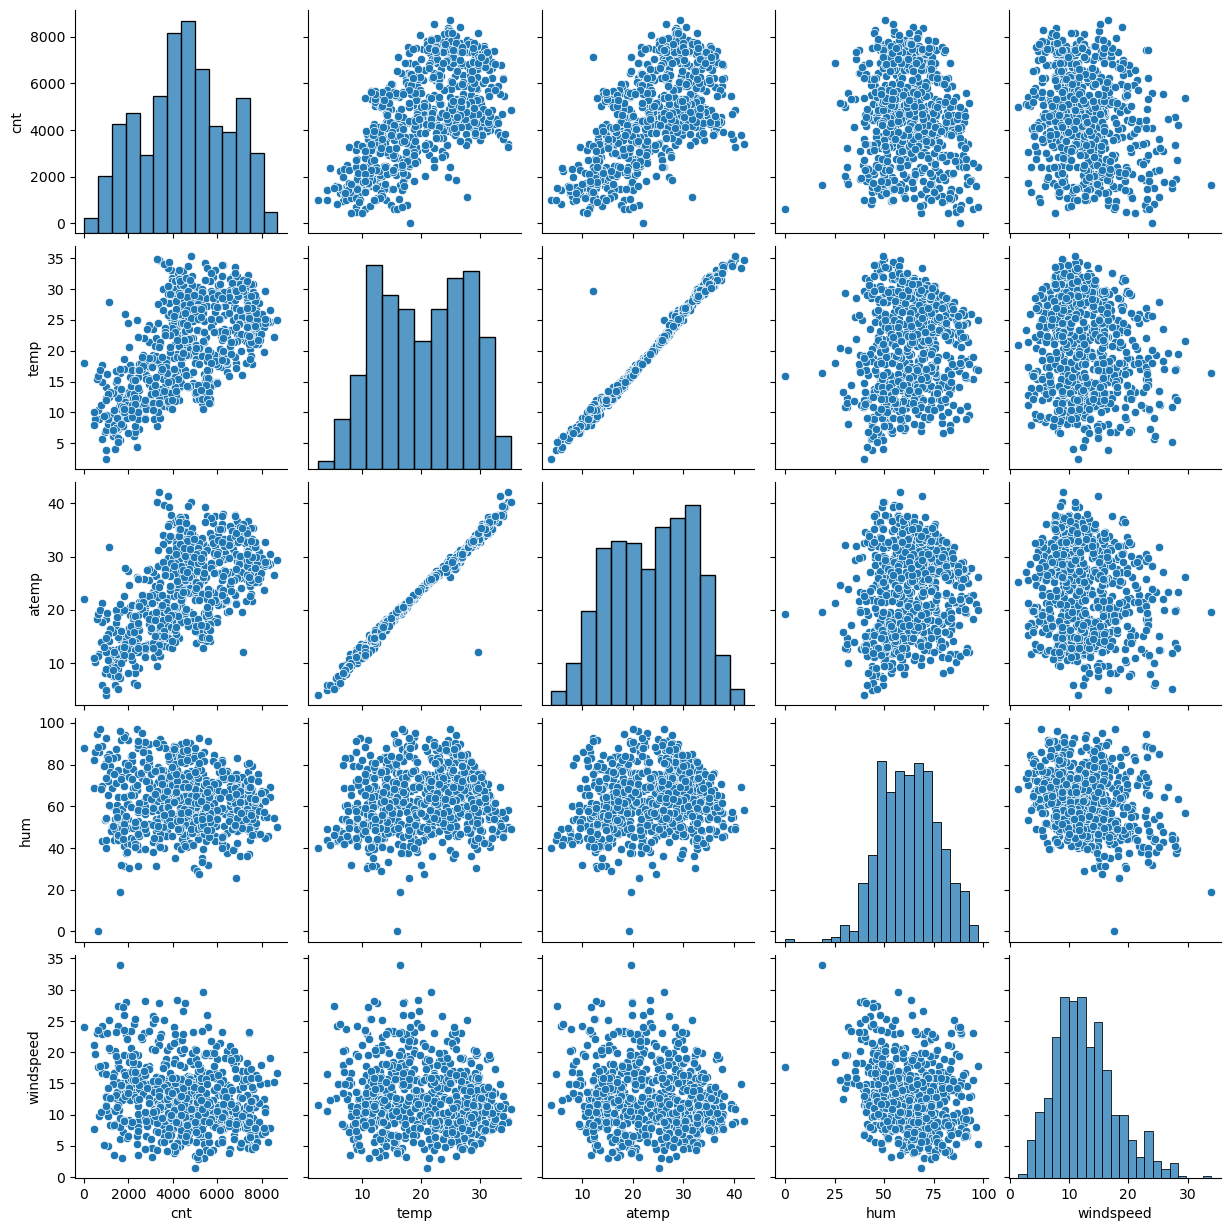

In [715]:
#We will visualise our data using matplotlib and seaborn.
sns.pairplot(data=df, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#By visualising the numeric variables, we can conclude that a linear model can be considered in this case because there are atleast some independent variables like atemp , temp etc
#that show a positive correlation with the target variable cnt.

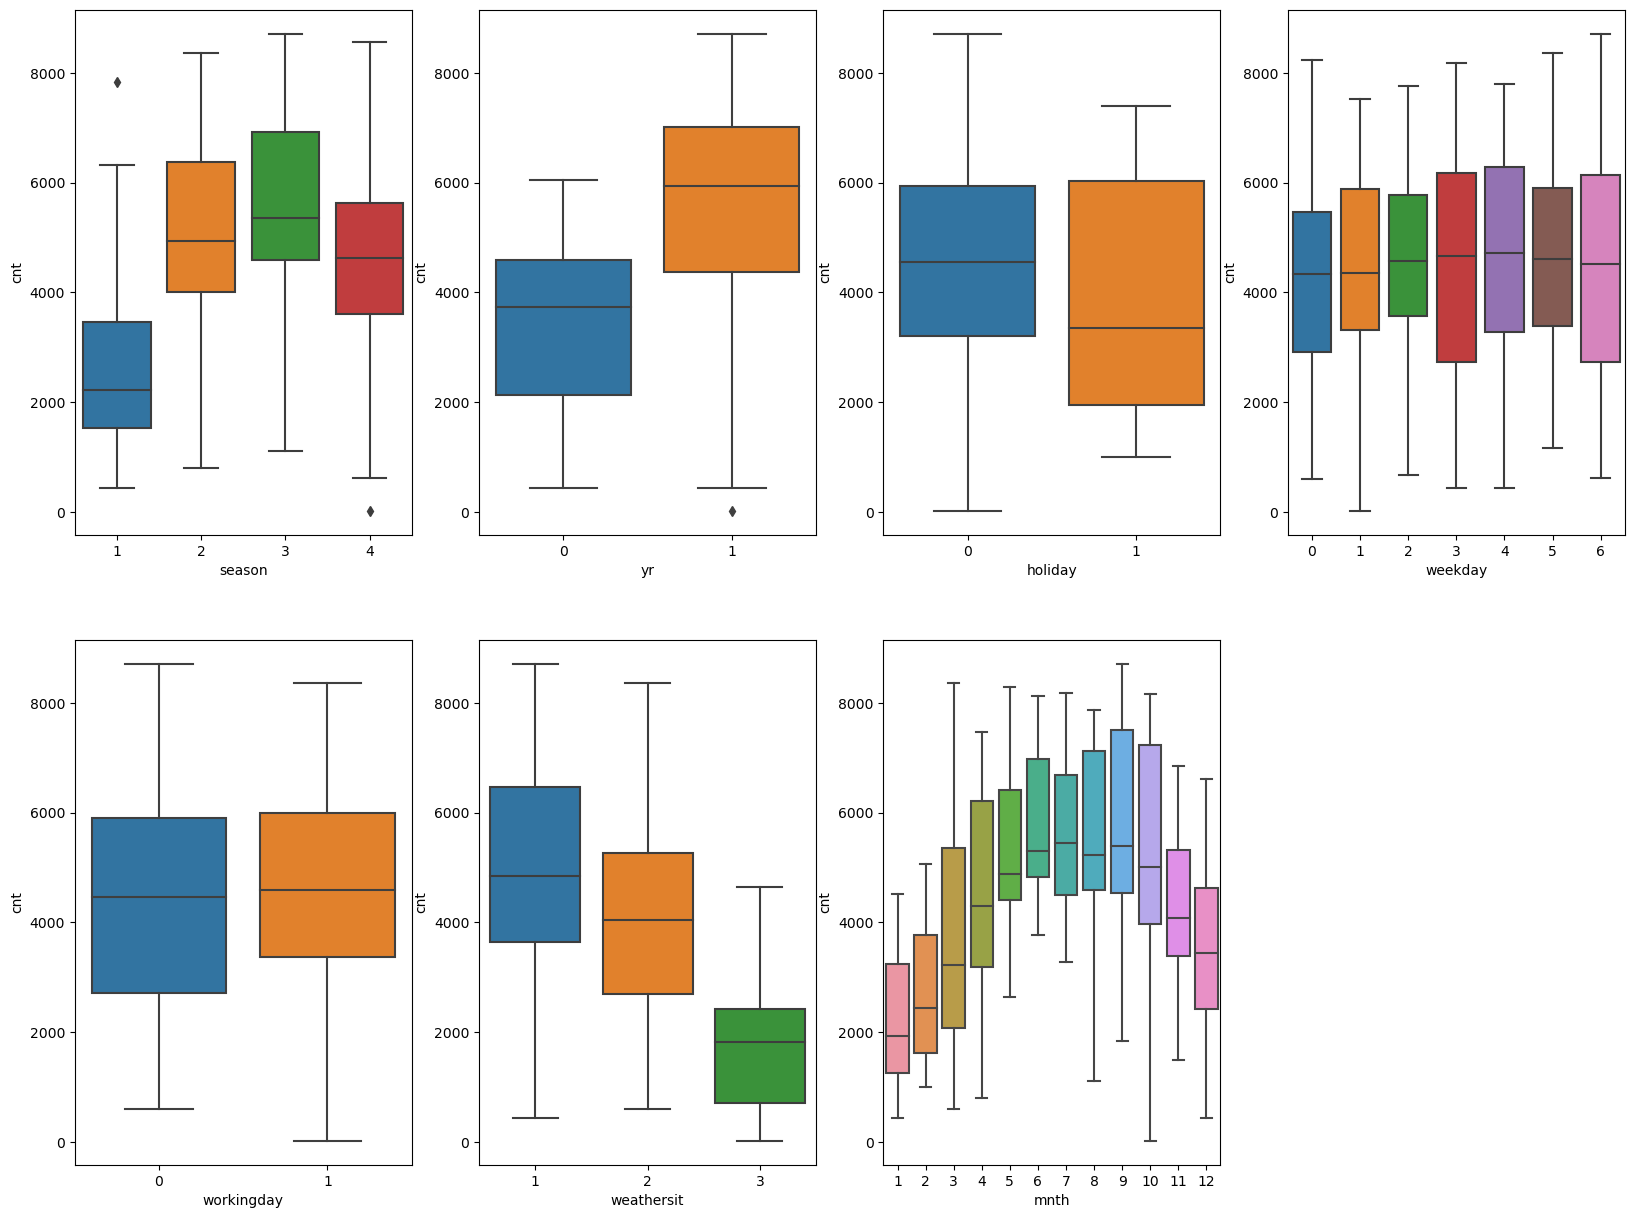

In [716]:
#visualising categorical variables using a boxplot
plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.show()

In [717]:
#Mapping the categorical values to their respective categorical string values (reference data dictionary)

import calendar
df['mnth'] = df['mnth'].apply(lambda x: calendar.month_abbr[x])

# Maping seasons
df.season = df.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

# Mapping weathersit
df.weathersit = df.weathersit.map({1:'Clear',2:'Mist & Cloudy',3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

#Mapping Weekday
df.weekday = df.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})


In [718]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [719]:
#Creating Dummy Variables
#We will create DUMMY variables for these 4 categorical variables namely - mnth, weekday, season & weathersit.

# Get the dummy variables for the features ''season','mnth','weekday','weathersit'' and store it in a new variable - 'dummy'
dummy = df[['season','mnth','weekday','weathersit']]

dummy = pd.get_dummies(dummy,drop_first=True)

# Adding the dummy variables to the original dataset
df = pd.concat([dummy,df],axis = 1)

df.drop(['season', 'weathersit', 'weekday', 'mnth'],axis=1,inplace=True)

df.replace({True: 1, False: 0}, inplace=True)

df.head()


,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [720]:
# basic step of linear regression splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size = 0.7, random_state = 100)

In [721]:

print(train.shape)
print(test.shape)
X.info()


(510, 30)
(220, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   yr                            730 non-null    int64  
 1   holiday                       730 non-null    int64  
 2   workingday                    730 non-null    int64  
 3   temp                          730 non-null    float64
 4   atemp                         730 non-null    float64
 5   hum                           730 non-null    float64
 6   windspeed                     730 non-null    float64
 7   season_Spring                 730 non-null    int64  
 8   season_Summer                 730 non-null    int64  
 9   season_Winter                 730 non-null    int64  
 10  mnth_Aug                      730 non-null    int64  
 11  mnth_Dec                      730 non-null    int64  
 12  mnth_Feb                      730 non-null  

In [722]:
# Rescaling the Features
#As we can see that the value of the feature cnt has much higher values as compared to the other features like temp, atemp etc. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. There are two common ways of rescaling:

# 1. Min-Max scaling
# 2.Standardisation (mean-0, sigma-1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095


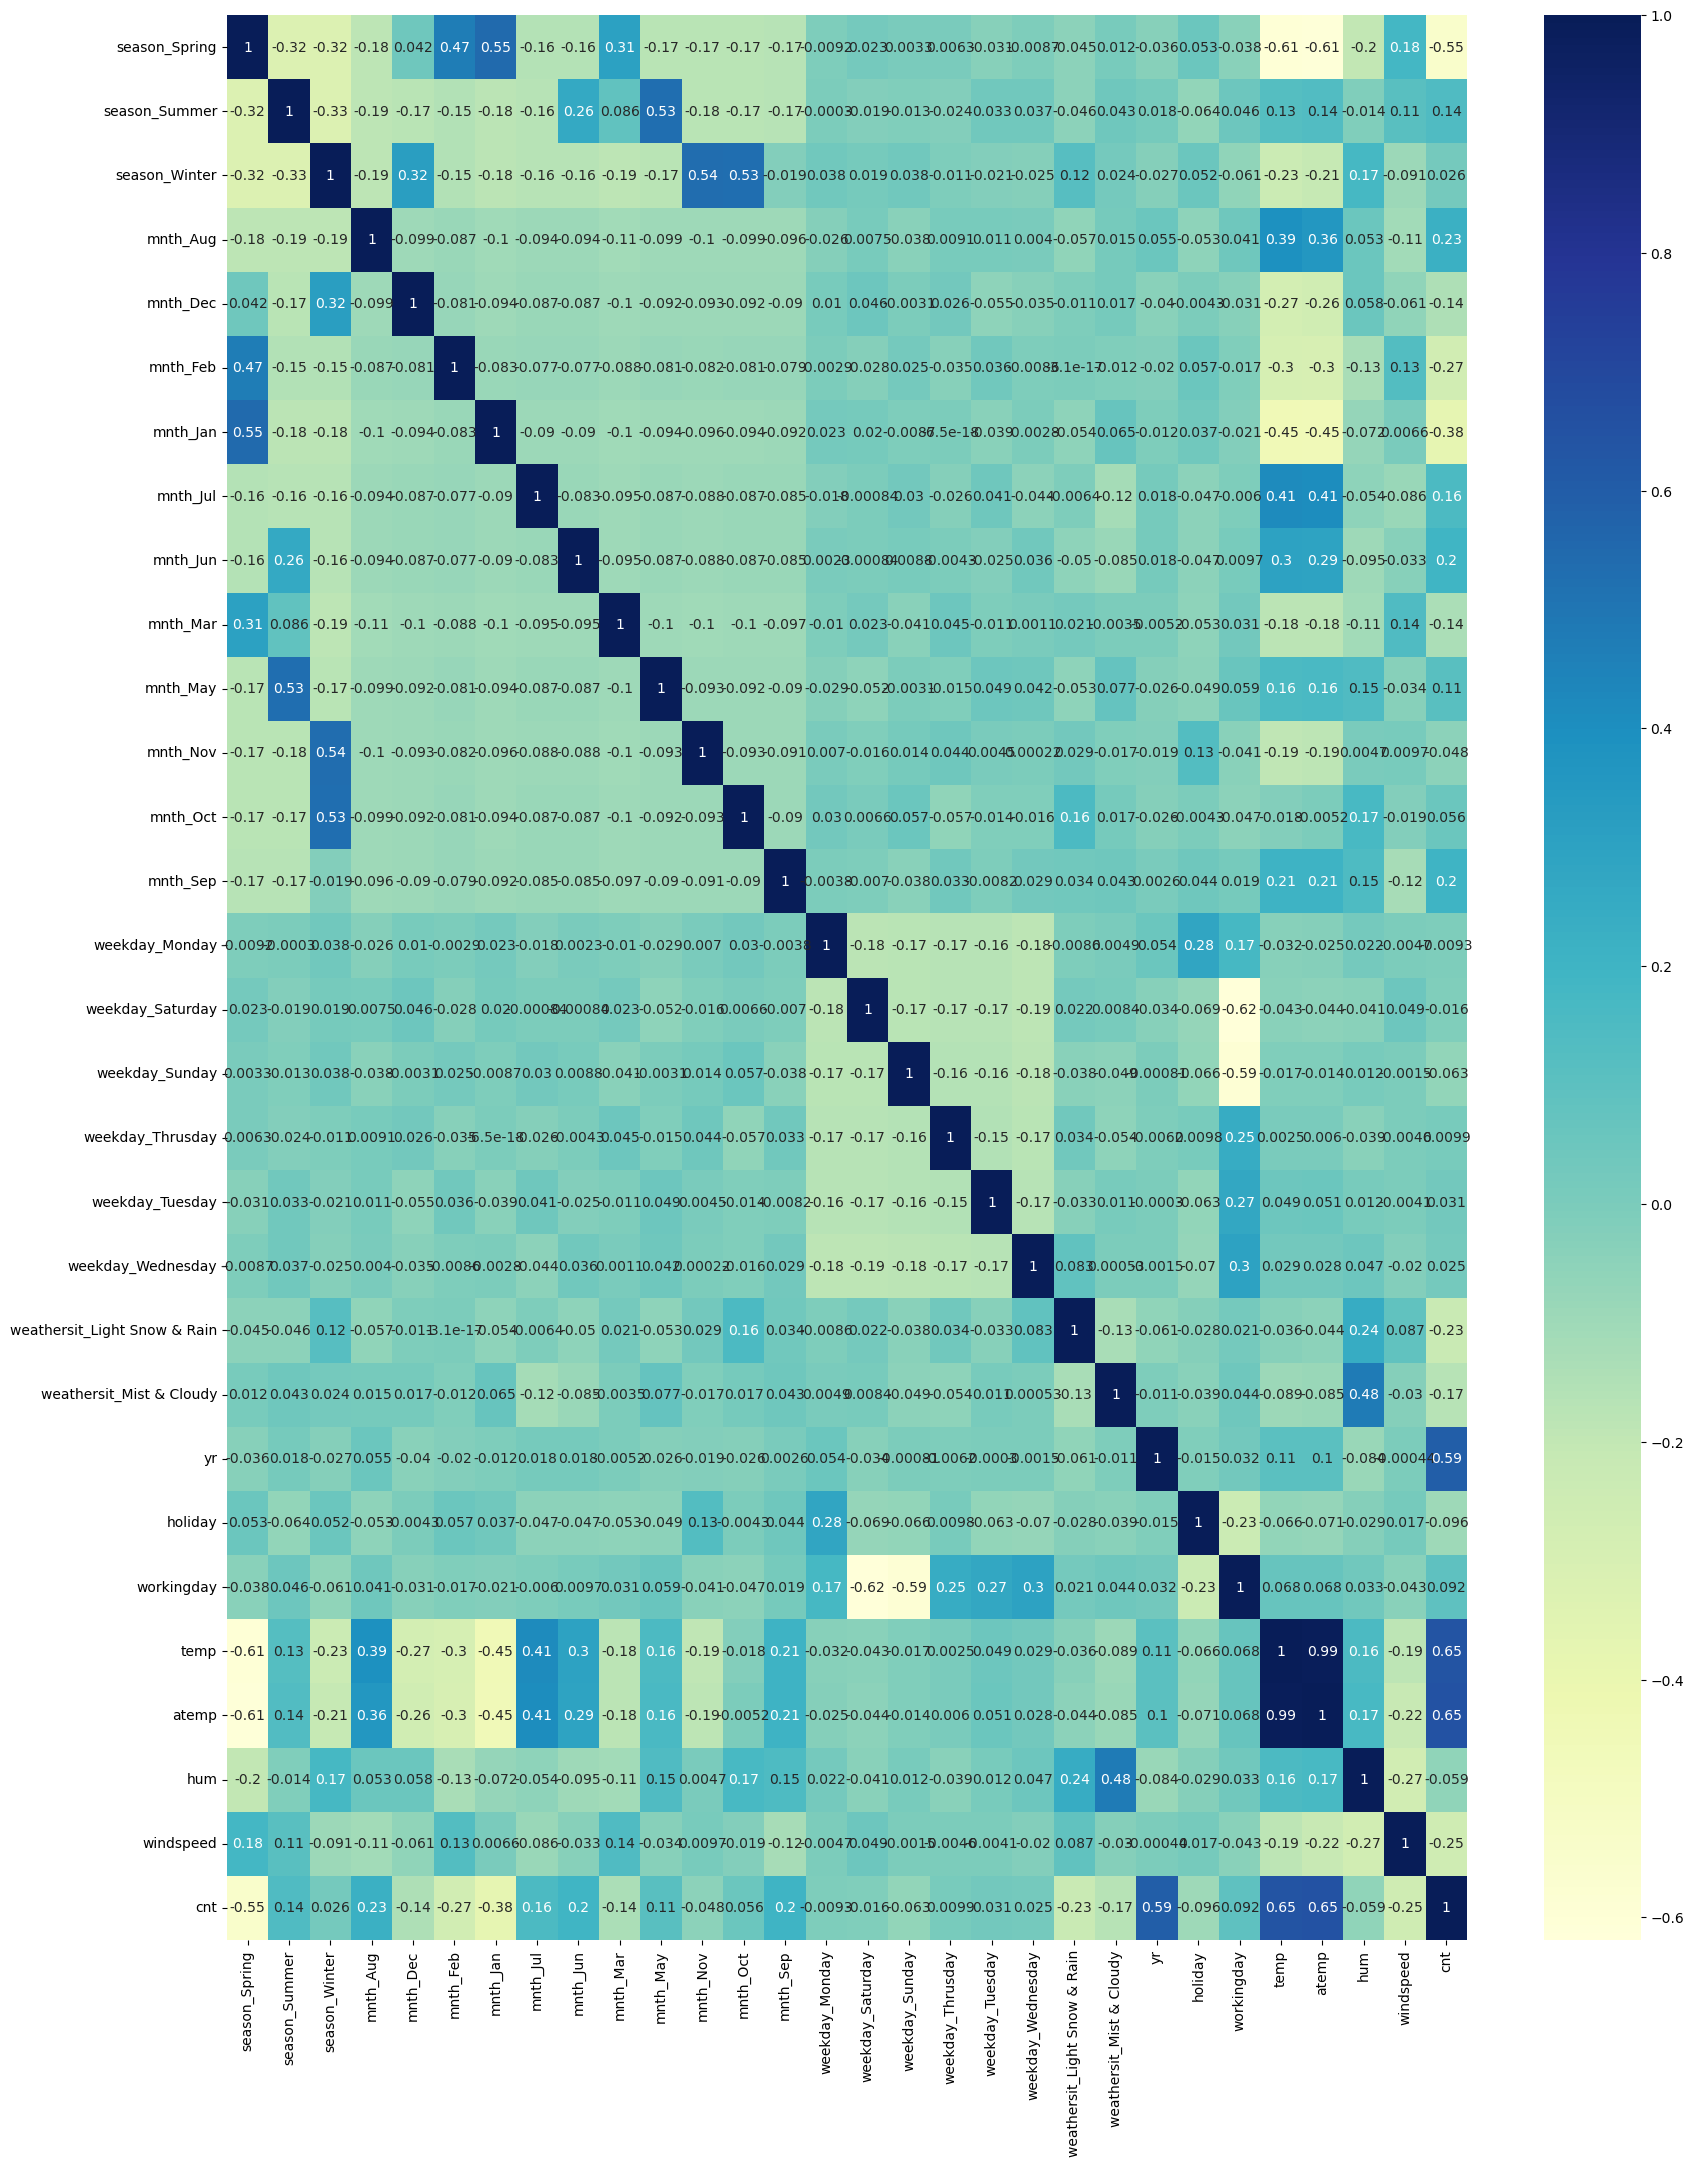

In [723]:
#Checking the coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 25))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [724]:
#Dividing into X and Y sets for the model building
y_train = train.pop('cnt')
X_train = train

In [725]:
#APPROACH USED :

#We will use a mixed approach to build the model.
#Here we are using RFE approach for feature selection and then we will use the statsmodel approach for building the model

#Feature Selection
#We start with 15 variables.
#We need to use the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [726]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [727]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 15),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 8),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 7),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 10),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 9),
 ('weekday_Thrusday', False, 12),
 ('weekday_Tuesday', False, 11),
 ('weekday_Wednesday', False, 14),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [728]:
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [729]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday', 'atemp'],
      dtype='object')

In [730]:
#Building model using statsmodel for the detailed statistics

# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]
X_train_rfe

,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Saturday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed
576,0,0,0,0,1,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1,0,0,0,0,0,1,0,1,1,0,0,0.442393,0.640189,0.255342
728,1,0,0,0,0,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,0,1,0,0,0,0,1,0,1,1,0,0,0.395666,0.504508,0.188475
111,0,1,0,0,0,0,0,0,1,0,0,1,0.345824,0.751824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0,0,0,0,0,0,0,0,0,1,0,1,0.863973,0.679690,0.187140
53,1,0,0,0,0,0,0,0,0,0,0,1,0.202618,0.435939,0.111379
350,0,0,1,0,0,0,1,0,1,0,0,0,0.248216,0.577930,0.431816
79,0,1,0,0,0,0,0,0,1,0,0,1,0.462664,0.759870,0.529881


In [731]:
#Adding a constant variable

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

In [732]:
#Building the first linear models using statsmodels

lm_1 = sm.OLS(y_train, X_train_lm).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 15 Apr 2024   Prob (F-statistic):          4.22e-191
Time:                        00:46:20   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2519      0.036      6.969      0.000       0.181       0.323
season_Spring                   -0.0509      0.021     -2.464      0.014      -0.091      -0.010
season_Summer                    0.0508      0.015      3.423      0.001       0.022       0.080
season_Winter                    0.0933      0.017      5.403      0.000       0.059       0.127
mnth_Jan                        -0.0345      0.017     -1.989      0.047      -0.069      -0.000
mnth_Jul                        -0.0529      0.018     -2.931      0.004      -0.088      -0.017
mnth_Sep                         0.0814      0.016      4.945      0.000       0.049       0.114
weekday_Saturday                 0.0536      0.014      3.694      0.000       0.025       0.082
weathersit_Light Snow & Rain    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
weathersit_Mist & Cloudy        -0.0563      0.010     -5.439      0.000      -0.077      -0.036
yr                               0.2305      0.008     28.795      0.000       0.215       0.246
holiday                         -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday                       0.0433      0.012      3.762      0.000       0.021       0.066
temp                             0.5096      0.034     14.837      0.000       0.442       0.577
hum                             -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed                       -0.1863      0.025     -7.310      0.000      -0.236      -0.136
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [733]:
# Checking VIF for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
13,hum,29.37
12,temp,17.78
11,workingday,5.31
14,windspeed,4.73
0,season_Spring,4.53
2,season_Winter,3.46
1,season_Summer,2.85
8,weathersit_Mist & Cloudy,2.29
9,yr,2.09
6,weekday_Saturday,1.98


In [734]:
#In general we want p-value to be less than 0.05. We will drop feature mnth_Jan which has p-value approx 0.05

X_train_rfe = X_train_rfe.drop(['mnth_Jan'], axis=1)

In [735]:
#Model2 

X_train_lm = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train, X_train_lm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 15 Apr 2024   Prob (F-statistic):          2.11e-191
Time:                        00:46:21   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2402      0.036      6.714      0.000       0.170       0.310
season_Spring                   -0.0555      0.021     -2.698      0.007      -0.096      -0.015
season_Summer                    0.0537      0.015      3.631      0.000       0.025       0.083
season_Winter                    0.0992      0.017      5.815      0.000       0.066       0.133
mnth_Jul                        -0.0546      0.018     -3.019      0.003      -0.090      -0.019
mnth_Sep                         0.0820      0.017      4.966      0.000       0.050       0.114
weekday_Saturday                 0.0530      0.015      3.648      0.000       0.024       0.082
weathersit_Light Snow & Rain    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
weathersit_Mist & Cloudy        -0.0563      0.010     -5.425      0.000      -0.077      -0.036
yr                               0.2298      0.008     28.647      0.000       0.214       0.246
holiday                         -0.0591      0.027     -2.192      0.029      -0.112      -0.006
workingday                       0.0430      0.012      3.725      0.000       0.020       0.066
temp                             0.5277      0.033     15.884      0.000       0.462       0.593
hum                             -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed                       -0.1809      0.025     -7.118      0.000      -0.231      -0.131
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [736]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
12,hum,28.46
11,temp,16.98
10,workingday,5.28
13,windspeed,4.72
0,season_Spring,4.24
2,season_Winter,3.42
1,season_Summer,2.85
7,weathersit_Mist & Cloudy,2.29
8,yr,2.08
5,weekday_Saturday,1.97


In [737]:
#In general we want VIF to be less than 5. We will drop feature hum which has highest VIF of 28.10

X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [738]:

#Model3

X_train_lm = sm.add_constant(X_train_rfe)
lm_3 = sm.OLS(y_train, X_train_lm).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Mon, 15 Apr 2024   Prob (F-statistic):          1.28e-188
Time:                        00:46:21   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1576      0.031      5.126      0.000       0.097       0.218
season_Spring                   -0.0655      0.021     -3.147      0.002      -0.106      -0.025
season_Summer                    0.0477      0.015      3.180      0.002       0.018       0.077
season_Winter                    0.0846      0.017      4.971      0.000       0.051       0.118
mnth_Jul                        -0.0496      0.018     -2.702      0.007      -0.086      -0.014
mnth_Sep                         0.0759      0.017      4.537      0.000       0.043       0.109
weekday_Saturday                 0.0579      0.015      3.924      0.000       0.029       0.087
weathersit_Light Snow & Rain    -0.2895      0.024    -11.880      0.000      -0.337      -0.242
weathersit_Mist & Cloudy        -0.0822      0.009     -9.514      0.000      -0.099      -0.065
yr                               0.2337      0.008     28.828      0.000       0.218       0.250
holiday                         -0.0567      0.027     -2.069      0.039      -0.111      -0.003
workingday                       0.0461      0.012      3.931      0.000       0.023       0.069
temp                             0.4915      0.033     15.027      0.000       0.427       0.556
windspeed                       -0.1491      0.025     -6.024      0.000      -0.198      -0.100
==============================================================================
Omnibus:                       66.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.148
Skew:                          -0.682   Prob(JB):                     6.17e-36
Kurtosis:                       5.402   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [739]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
11,temp,6.97
10,workingday,5.20
12,windspeed,4.65
0,season_Spring,2.49
1,season_Summer,2.34
8,yr,2.07
2,season_Winter,1.98
5,weekday_Saturday,1.96
3,mnth_Jul,1.58
7,weathersit_Mist & Cloudy,1.57


In [740]:
#In general we want VIF to be less than 5. We will drop feature atemp which has highest VIF of 6.97

X_train_rfe = X_train_rfe.drop(['holiday'], axis=1)

In [741]:


#Model4

X_train_lm = sm.add_constant(X_train_rfe)
lm_4 = sm.OLS(y_train, X_train_lm).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 15 Apr 2024   Prob (F-statistic):          7.12e-189
Time:                        00:46:21   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1492      0.031      4.881      0.000       0.089       0.209
season_Spring                   -0.0664      0.021     -3.182      0.002      -0.107      -0.025
season_Summer                    0.0481      0.015      3.196      0.001       0.019       0.078
season_Winter                    0.0838      0.017      4.910      0.000       0.050       0.117
mnth_Jul                        -0.0486      0.018     -2.637      0.009      -0.085      -0.012
mnth_Sep                         0.0740      0.017      4.414      0.000       0.041       0.107
weekday_Saturday                 0.0664      0.014      4.671      0.000       0.038       0.094
weathersit_Light Snow & Rain    -0.2883      0.024    -11.795      0.000      -0.336      -0.240
weathersit_Mist & Cloudy        -0.0817      0.009     -9.428      0.000      -0.099      -0.065
yr                               0.2339      0.008     28.756      0.000       0.218       0.250
workingday                       0.0545      0.011      4.938      0.000       0.033       0.076
temp                             0.4920      0.033     14.991      0.000       0.427       0.556
windspeed                       -0.1499      0.025     -6.040      0.000      -0.199      -0.101
==============================================================================
Omnibus:                       72.429   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.537
Skew:                          -0.721   Prob(JB):                     1.40e-40
Kurtosis:                       5.560   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [742]:
#Now as you can see, the VIFs and p-values both are within an acceptable range. Hence, we finalise lm_4 as the final model to proceed with the future prdeictions.

In [743]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
10,temp,6.73
9,workingday,4.66
11,windspeed,4.64
0,season_Spring,2.38
1,season_Summer,2.32
8,yr,2.07
2,season_Winter,1.91
5,weekday_Saturday,1.83
3,mnth_Jul,1.58
7,weathersit_Mist & Cloudy,1.57


In [745]:


#In general we want VIF to be less than 5. We will drop feature atemp which has highest VIF of 6.97

X_train_rfe = X_train_rfe.drop(['windspeed'], axis=1)

In [746]:
#Model5

X_train_lm = sm.add_constant(X_train_rfe)
lm_5 = sm.OLS(y_train, X_train_lm).fit()
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.1
Date:                Mon, 15 Apr 2024   Prob (F-statistic):          1.94e-182
Time:                        00:51:36   Log-Likelihood:                 487.95
No. Observations:                 510   AIC:                            -951.9
Df Residuals:                     498   BIC:                            -901.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0989      0.030      3.248      0.001       0.039       0.159
season_Spring                   -0.0760      0.022     -3.528      0.000      -0.118      -0.034
season_Summer                    0.0381      0.015      2.462      0.014       0.008       0.068
season_Winter                    0.0850      0.018      4.811      0.000       0.050       0.120
mnth_Jul                        -0.0487      0.019     -2.554      0.011      -0.086      -0.011
mnth_Sep                         0.0783      0.017      4.517      0.000       0.044       0.112
weekday_Saturday                 0.0642      0.015      4.367      0.000       0.035       0.093
weathersit_Light Snow & Rain    -0.3032      0.025    -12.045      0.000      -0.353      -0.254
weathersit_Mist & Cloudy        -0.0799      0.009     -8.919      0.000      -0.098      -0.062
yr                               0.2329      0.008     27.665      0.000       0.216       0.249
workingday                       0.0556      0.011      4.866      0.000       0.033       0.078
temp                             0.5038      0.034     14.860      0.000       0.437       0.570
==============================================================================
Omnibus:                       76.254   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.812
Skew:                          -0.729   Prob(JB):                     1.67e-46
Kurtosis:                       5.792   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [747]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
10,temp,6.03
9,workingday,4.63
8,yr,2.07
1,season_Summer,2.06
5,weekday_Saturday,1.81
0,season_Spring,1.78
2,season_Winter,1.73
3,mnth_Jul,1.58
7,weathersit_Mist & Cloudy,1.57
4,mnth_Sep,1.34


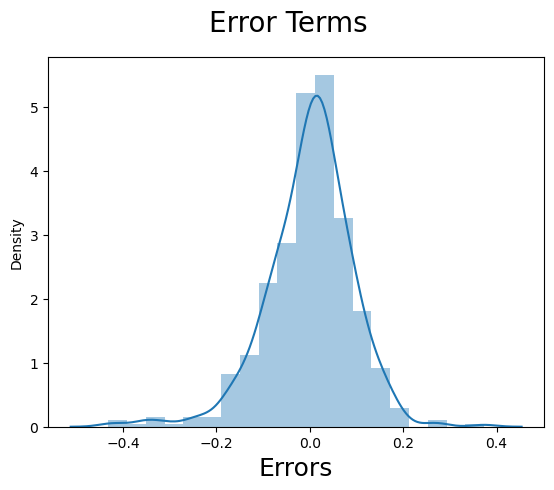

In [749]:
#Residual Analysis of the train data
y_train_pred = lm_5.predict(X_train_lm)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  
plt.xlabel('Errors', fontsize = 18)  
plt.show()

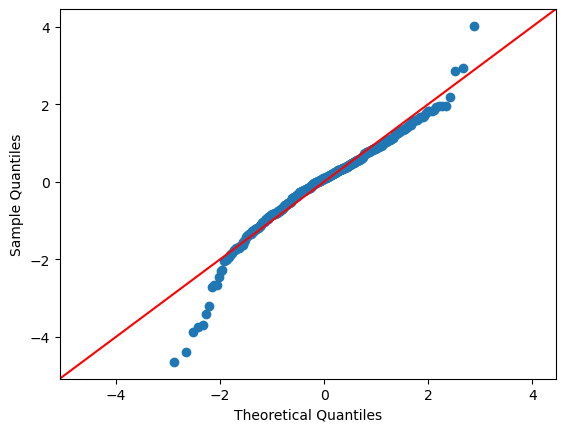

In [750]:
#Cross-verifying the above conclusion using a qq-plot as well:

sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

#Here we see that most of the data points lie on the straight line , which indicates that the error terms are normally distributed .

In [751]:
# Making Predictions Using the Final Model

num_vars = ['cnt','hum','windspeed','temp','atemp']

test[num_vars] = scaler.transform(test[num_vars])

test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,...,0.027273,0.318182,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,...,0.163248,0.466833,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [752]:
#Dividing into X_test and y_test
y_test = test.pop('cnt')
X_test = test

In [754]:
# Making predictions using the final model

X_test = sm.add_constant(X_test[X_train_rfe.columns])
y_test_pred = lm_5.predict(X_test)

In [755]:
from sklearn.metrics import r2_score
print('r2_score of train dataset', r2_score(y_train, y_train_pred))
print('r2_score of test dataset', r2_score(y_test, y_test_pred))

r2_score of train dataset 0.8281240860777717
r2_score of test dataset 0.8124034216181586


Text(0, 0.5, 'y_pred')

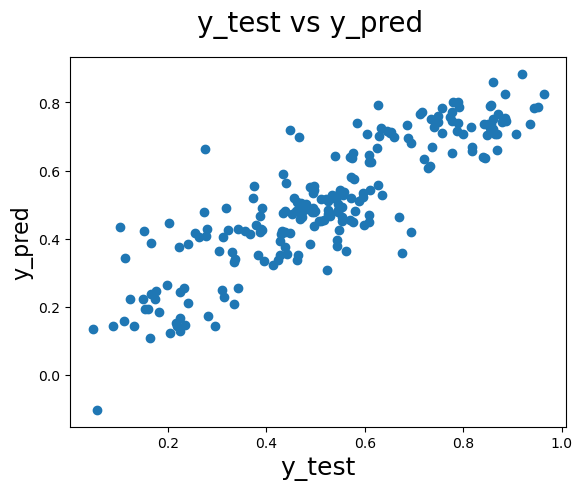

In [700]:
#Model Evaluation
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [759]:
#We can colude that the final model fit isn't by chance, and has descent predictive power.

param = pd.DataFrame(lm_5.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
11,temp,0.503829
9,yr,0.232855
0,const,0.098899
3,season_Winter,0.084985
5,mnth_Sep,0.078321
6,weekday_Saturday,0.064222
10,workingday,0.055608
2,season_Summer,0.038091
4,mnth_Jul,-0.048703


In [ ]:
#Final Conclusions :

# 1. All the positive coefficients like temp,season_Winter indicate that an increase in these values will lead to an increase in the value of cnt.
# 2. All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.